# Régression logistique — Classification binaire

**Dataset :** Breast Cancer Wisconsin (sklearn)

Ce notebook entraîne une régression logistique pour prédire si une tumeur est maligne ou bénigne, à partir du dataset intégré à scikit-learn. On met en place une pipeline avec standardisation, on évalue avec des métriques de classification (Accuracy, Precision, Recall, F1, ROC-AUC) et on trace la matrice de confusion ainsi que la courbe ROC.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report)
import matplotlib.pyplot as plt

## 1) Chargement du dataset 

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign
print(f"Shape X: {X.shape}, y: {y.shape}")
X.head()

Shape X: (569, 30), y: (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2) Séparation train / test (stratifiée)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape

((455, 30), (114, 30))

## 3) Pipeline (StandardScaler + LogisticRegression) et entraînement

In [4]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


## 4) Évaluation sur le test set

In [5]:
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Précision : {prec:.3f}")
print(f"Rappel    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}")
print(f"ROC-AUC   : {auc:.3f}")

print('\nClassification report:\n')
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy : 0.982
Précision : 0.986
Rappel    : 0.986
F1-score  : 0.986
ROC-AUC   : 0.995

Classification report:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



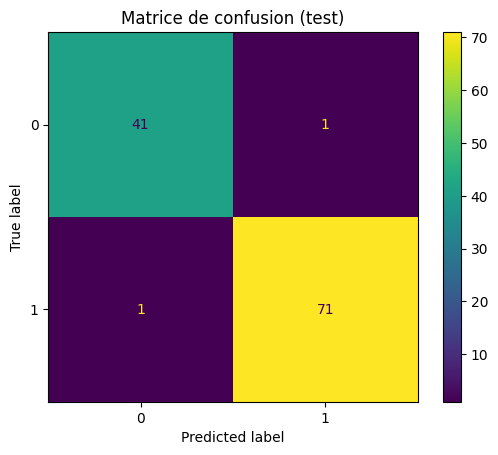

In [8]:
disp = ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)
plt.title('Matrice de confusion (test)')
plt.show()

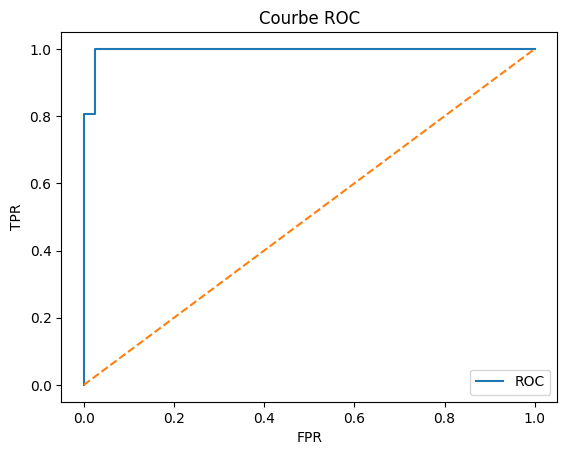

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Courbe ROC')
plt.legend()
plt.show()